 <img src = "img.png">

# Data Science Exercise

This exercise is about retention versus churn (departure) of customers from HubPay.
All retail service providers experience churn, and there is competitive advantage to be gained from predicting the customers that will depart and taking steps to retain them

The Objectives of the exercise are to:

    1.Perform basic descriptive analytics to understand whether any of the features in the data are associated with churn
    
    2.Prepare and cleanse the data to make it suitable for modelling
    
    3.Build classification models to predict churn, using at least two alternative machine learning techniques, and perform appropriate validation upon these models
    
    4.Evaluate the performance of the models and any shortcomings that are evident, and opine as to whether the models are adequate for decision-making
    
    5.Build logistic regression model(s) explaining churn in terms of the explanatory variables and provide interpretations of coefficients and coefficient standard errors in these model(s)


# Importing Relevant Libraries

In this section, we import all relevant libraries needed to meet our objective

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import pickle

In [89]:
# I don't have xgboost installed so I installed here
# pip install xgboost
from xgboost import XGBClassifier

# Exploratory Data Analysis

Reading Dataset

In [7]:
df = pd.read_csv("Customer_Churn_Data_v2.csv")
df.sample(5)

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
1791,1792,41351.026970,40080.52434,13.0,0,29,19814.912160,AE_IN,0,0,0,0,0.961542,0
3764,3765,3878.004510,NaN,2.0,0,20,1200.493395,AE_PK,0,0,0,0,0.370917,1
203,204,46512.876190,33374.48241,13.0,0,22,25181.057820,AE_IN,0,0,0,0,1.432957,0
4682,4683,9228.032456,18707.31287,4.0,0,31,5315.408985,AE_IN,0,0,0,0,1.160456,0
3718,3719,30314.792400,81934.11124,15.0,0,23,20198.371470,AE_PK,0,0,0,0,0.852729,0


In [8]:
df.shape

(7432, 14)

Checking Data Type

In [9]:
df.dtypes

cust_id                                  int64
income                                 float64
debt_with_other_lenders                float64
credit_score                           float64
has_previous_defaults_other_lenders      int64
num_remittances_prev_12_mth              int64
remittance_amt_prev_12_mth             float64
main_remittance_corridor                object
opened_campaign_1                        int64
opened_campaign_2                        int64
opened_campaign_3                        int64
opened_campaign_4                        int64
tenure_years                           float64
churned                                  int64
dtype: object

Income, debt_with_other_lenders, credit_score are meant to be float or int data type

In [10]:
#Lets check and see what the issue is
df1 = df[pd.to_numeric(df.income,errors='coerce').isnull()]
df1.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
59,60,NaN,43289.045190,9.0,0,18,12033.913160,AE_PK,0,0,0,0,2.395957,0
94,95,NaN,24642.825310,7.0,1,22,8236.839606,AE_PK,1,0,0,1,1.679304,0
212,213,NaN,1632.956718,2.0,0,18,1499.629811,AE_PK,0,0,0,0,1.382719,0
232,233,NaN,16213.468180,4.0,0,25,7495.786348,AE_PK,0,0,0,0,0.523328,0
235,236,NaN,55011.606990,8.0,1,28,1150.097585,AE_IN,0,0,0,1,0.770036,1


In [11]:
df2 = df[pd.to_numeric(df.debt_with_other_lenders,errors='coerce').isnull()]
df2.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
15,16,12664.869050,NaN,5.0,0,23,3533.582080,AE_IN,0,0,0,0,0.368532,1
22,23,13734.955730,NaN,7.0,1,28,4324.823984,AE_IN,0,0,0,0,0.479024,1
40,41,6677.353290,NaN,4.0,1,14,4546.988818,AE_PK,0,0,0,0,1.199639,0
109,110,6174.622364,NaN,3.0,0,25,1169.718805,AE_IN,1,0,0,0,1.577643,0
130,131,8900.689168,NaN,4.0,0,24,1902.738131,AE_IN,1,0,0,0,1.588867,0


In [12]:
df3 = df[pd.to_numeric(df.credit_score,errors='coerce').isnull()]
df3.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
26,27,17050.88032,13796.82406,NaN,0,24,4143.831381,AE_PK,0,0,0,0,1.088632,0
44,45,29062.36911,44209.97239,NaN,0,14,18310.790570,AE_IN,0,0,0,0,2.621682,0
50,51,17098.72002,19315.82411,NaN,1,30,6792.695344,AE_IN,0,0,0,0,2.885565,0
89,90,15567.36742,26949.65022,NaN,0,25,7979.001823,AE_IN,0,0,0,0,0.306404,1
101,102,16093.97296,48352.61055,NaN,0,17,6495.976883,AE_IN,0,0,0,0,1.980920,0


the column seem to contain some white spaces, lets see how many

In [13]:
df1.shape, df2.shape, df3.shape

((233, 14), (295, 14), (295, 14))

Lets convert whitespaces to null values

In [14]:
new_df = df.replace(r'^\s*$', np.NaN, regex=True)

In [15]:
new_df.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


Lets see what dataFrame looks like 

In [16]:
df[pd.to_numeric(df.income,errors='coerce').isnull()].head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
59,60,NaN,43289.045190,9.0,0,18,12033.913160,AE_PK,0,0,0,0,2.395957,0
94,95,NaN,24642.825310,7.0,1,22,8236.839606,AE_PK,1,0,0,1,1.679304,0
212,213,NaN,1632.956718,2.0,0,18,1499.629811,AE_PK,0,0,0,0,1.382719,0
232,233,NaN,16213.468180,4.0,0,25,7495.786348,AE_PK,0,0,0,0,0.523328,0
235,236,NaN,55011.606990,8.0,1,28,1150.097585,AE_IN,0,0,0,1,0.770036,1


In [17]:
df[pd.to_numeric(df.debt_with_other_lenders,errors='coerce').isnull()].head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
15,16,12664.869050,NaN,5.0,0,23,3533.582080,AE_IN,0,0,0,0,0.368532,1
22,23,13734.955730,NaN,7.0,1,28,4324.823984,AE_IN,0,0,0,0,0.479024,1
40,41,6677.353290,NaN,4.0,1,14,4546.988818,AE_PK,0,0,0,0,1.199639,0
109,110,6174.622364,NaN,3.0,0,25,1169.718805,AE_IN,1,0,0,0,1.577643,0
130,131,8900.689168,NaN,4.0,0,24,1902.738131,AE_IN,1,0,0,0,1.588867,0


In [18]:
df[pd.to_numeric(df.credit_score,errors='coerce').isnull()].head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
26,27,17050.88032,13796.82406,NaN,0,24,4143.831381,AE_PK,0,0,0,0,1.088632,0
44,45,29062.36911,44209.97239,NaN,0,14,18310.790570,AE_IN,0,0,0,0,2.621682,0
50,51,17098.72002,19315.82411,NaN,1,30,6792.695344,AE_IN,0,0,0,0,2.885565,0
89,90,15567.36742,26949.65022,NaN,0,25,7979.001823,AE_IN,0,0,0,0,0.306404,1
101,102,16093.97296,48352.61055,NaN,0,17,6495.976883,AE_IN,0,0,0,0,1.980920,0


To Further Explore my Data I want to drop rows with NaN values

In [19]:
df_no_na = new_df.dropna()
df_no_na.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


In [20]:
df_no_na.shape

(6638, 14)

After droping missing value, lets see howmuch data left for analysis

In [21]:
print('Percentage of data left after dropping missing values {}%'.format(((df_no_na.shape[0])/(df.shape[0]))*100))

Percentage of data left after dropping missing values 89.31646932185146%


Lets look at what the values of our data columns look like

In [22]:
def print_unique_col_values(df):
       for column in df_no_na:
            print(f'{column}: {df_no_na[column].unique()}') 
print_unique_col_values(df_no_na)

cust_id: [   1    2    3 ... 7430 7431 7432]
income: [63863.13588  51537.47964   3298.248451 ... 46424.99755  28140.26622
 14095.82627 ]
debt_with_other_lenders: [87983.13439  63655.10915   4776.336091 ... 24527.67428  58965.30648
 13166.6542  ]
credit_score: [20. 17.  2.  5.  3.  7.  1.  8.  9.  4.  6. 12. 19. 11. 13. 14. 16. 10.
 15. 18.]
has_previous_defaults_other_lenders: [0 1]
num_remittances_prev_12_mth: [ 22  20  26  18  21  13  24  25  31  28  27  30  29  23 316  16  12  34
   8  19  33 324  17  32  35 327  15 347 339  14  11 314 328 329 323   9
  36 330 349  37  40 336 341 319 344 348 345 325 311 303 309  10 338 321
 337  38 300 313 302 340 308 322 342 304 333 334 317 343 306 335 346 310
 320 307 301 312 318 305 332 350  39 315 331 326   7]
remittance_amt_prev_12_mth: [23377.33823   8353.525522  1213.782465 ... 22261.95628   6162.548544
  4289.214953]
main_remittance_corridor: ['AE_IN' 'AE_PK' 'AE_PH']
opened_campaign_1: [0 1]
opened_campaign_2: [0 1]
opened_campaign_3: [0 1]

And again our data types

In [23]:
df_no_na.dtypes

cust_id                                  int64
income                                 float64
debt_with_other_lenders                float64
credit_score                           float64
has_previous_defaults_other_lenders      int64
num_remittances_prev_12_mth              int64
remittance_amt_prev_12_mth             float64
main_remittance_corridor                object
opened_campaign_1                        int64
opened_campaign_2                        int64
opened_campaign_3                        int64
opened_campaign_4                        int64
tenure_years                           float64
churned                                  int64
dtype: object

One of our feature/colums apears to be a categorical data, lets treat that

Performing One hot encoding for categorical column (main_remittance_corridor)

In [24]:
hot_encoded = pd.get_dummies(data=df_no_na, columns=['main_remittance_corridor'])
hot_encoded.columns

Index(['cust_id', 'income', 'debt_with_other_lenders', 'credit_score',
       'has_previous_defaults_other_lenders', 'num_remittances_prev_12_mth',
       'remittance_amt_prev_12_mth', 'opened_campaign_1', 'opened_campaign_2',
       'opened_campaign_3', 'opened_campaign_4', 'tenure_years', 'churned',
       'main_remittance_corridor_AE_IN', 'main_remittance_corridor_AE_PH',
       'main_remittance_corridor_AE_PK'],
      dtype='object')

In [25]:
hot_encoded.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned,main_remittance_corridor_AE_IN,main_remittance_corridor_AE_PH,main_remittance_corridor_AE_PK
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,0,0,0,0,2.065258,0,1,0,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,0,0,0,0,2.761676,0,0,0,1
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,0,0,0,0,0.297064,1,0,0,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,0,0,0,0,2.623058,0,1,0,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,0,0,0,0,0.160443,0,0,0,1


More Exploration

In [26]:
# Lets Describe our dataset
hot_encoded.describe()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned,main_remittance_corridor_AE_IN,main_remittance_corridor_AE_PH,main_remittance_corridor_AE_PK
count,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000
mean,3717.925279,24077.287863,31987.129237,8.015065,0.201115,34.302049,10769.823404,0.041277,0.021995,0.013106,0.111178,1.496376,0.072462,0.510997,0.143869,0.345134
std,2144.916168,18905.538858,36988.660096,5.020562,0.400864,57.685320,9850.897280,0.198946,0.146677,0.113739,0.314376,0.871284,0.259270,0.499917,0.350983,0.475448
min,1.000000,1434.354208,653.062575,1.000000,0.000000,7.000000,455.821035,0.000000,0.000000,0.000000,0.000000,0.000322,0.000000,0.000000,0.000000,0.000000
25%,1865.250000,11657.025275,11083.185205,4.000000,0.000000,20.000000,4580.143122,0.000000,0.000000,0.000000,0.000000,0.738610,0.000000,0.000000,0.000000,0.000000
50%,3710.500000,19010.887035,20660.959015,7.000000,0.000000,23.000000,8068.427593,0.000000,0.000000,0.000000,0.000000,1.495018,0.000000,1.000000,0.000000,0.000000
75%,5575.750000,30246.748850,39374.946608,10.000000,0.000000,27.000000,13718.816140,0.000000,0.000000,0.000000,0.000000,2.252410,0.000000,1.000000,0.000000,1.000000
max,7432.000000,244970.926100,715752.663000,20.000000,1.000000,350.000000,137563.019000,1.000000,1.000000,1.000000,1.000000,2.999704,1.000000,1.000000,1.000000,1.000000


# Data Visualization

Lets visualise all our columns

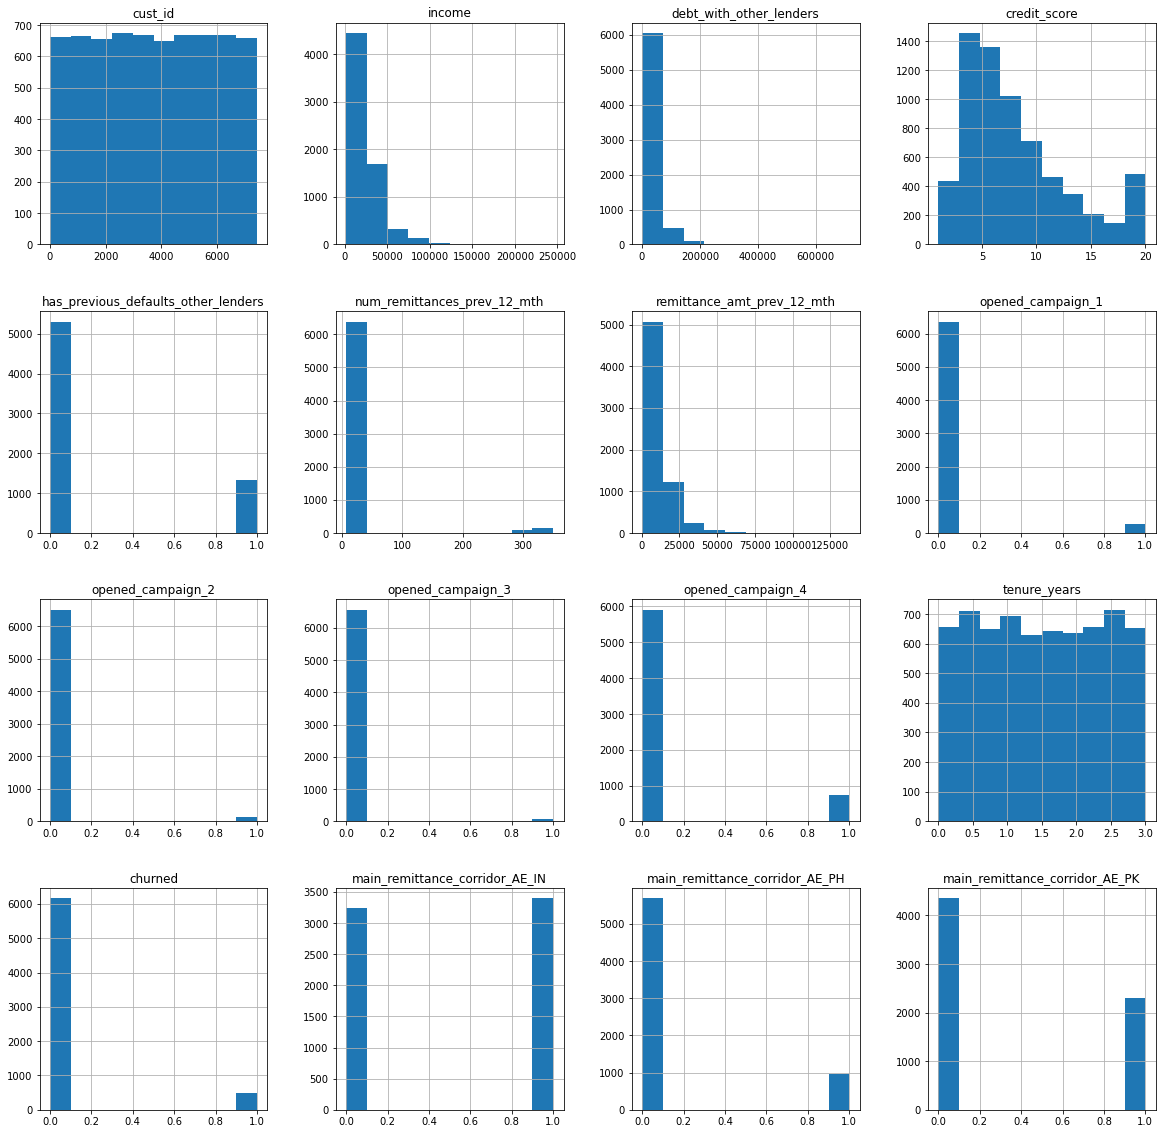

In [27]:
hot_encoded.hist(figsize=(20,20))
plt.show()

Lets see relationship between the churned customer as to against the un_churned ones

C:\Users\FrankEnedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


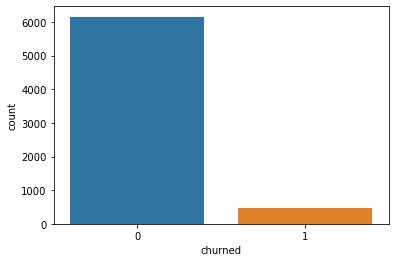

In [28]:
sns.countplot(df_no_na["churned"])
plt.show()

C:\Users\FrankEnedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


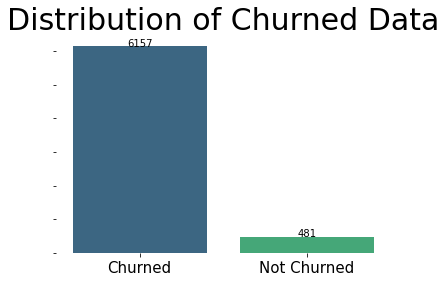

In [29]:
# using seaborns countplot to show distribution
fig, ax = plt.subplots()
g = sns.countplot(df_no_na.churned, palette='viridis')
g.set_xticklabels(['Churned', 'Not Churned'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Churned Data', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Lets also see the percentage distribution

In [30]:
print("Percentage of Customer Churned is {:.1f}% and non-promoted employees is: {:.1f}%".format(
    df_no_na[df_no_na['churned'] == 1].shape[0] / df_no_na.shape[0]*100,
    df_no_na[df_no_na['churned'] == 0].shape[0] / df_no_na.shape[0]*100))

Percentage of Customer Churned is 7.2% and non-promoted employees is: 92.8%


Lets also look at the correlations visual of the columns

In [31]:
# Calculate correlations
corr = df_no_na.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

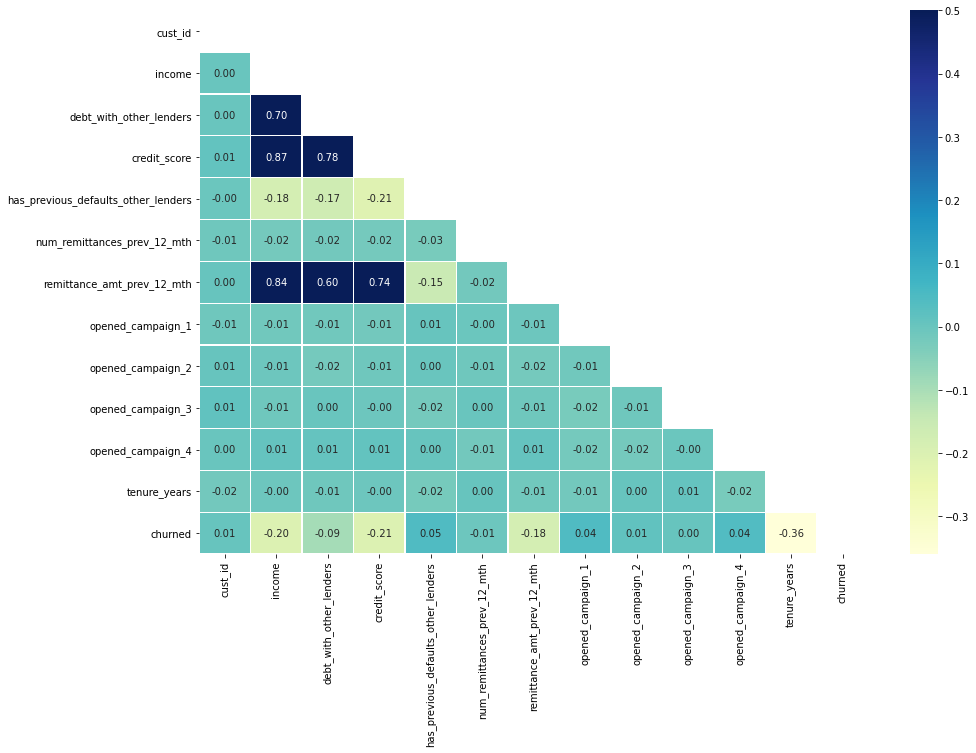

In [32]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

From the result of the correlation heatmap, we see that churned is either negatively correlated or has very poor correlate=ion with all othe features.

So when Income is increasing, its is less likely for customers to churn, when credit score or debt is high, their is less likelyhood for customer to churn 

In [33]:
correlations = df_no_na.corr()['churned'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 opened_campaign_2                      0.013552
opened_campaign_4                      0.041635
opened_campaign_1                      0.044241
has_previous_defaults_other_lenders    0.045323
churned                                1.000000
Name: churned, dtype: float64

Most Negative Correlations: 
 tenure_years                 -0.359714
credit_score                 -0.205139
income                       -0.203039
remittance_amt_prev_12_mth   -0.181006
debt_with_other_lenders      -0.093960
Name: churned, dtype: float64


# Data Modelling

Declearing Dependent and Independent Variable

In [34]:
X = hot_encoded.drop(["churned", 'cust_id'], axis = 1)

In [35]:
X.head()

,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,main_remittance_corridor_AE_IN,main_remittance_corridor_AE_PH,main_remittance_corridor_AE_PK
0,63863.135880,87983.134390,20.0,0,22,23377.338230,0,0,0,0,2.065258,1,0,0
1,51537.479640,63655.109150,17.0,0,20,8353.525522,0,0,0,0,2.761676,0,0,1
2,3298.248451,4776.336091,2.0,0,26,1213.782465,0,0,0,0,0.297064,0,0,1
3,14402.605700,13925.390670,5.0,0,18,6202.880445,0,0,0,0,2.623058,1,0,0
4,8635.683507,10143.513660,3.0,0,21,6175.393029,0,0,0,0,0.160443,0,0,1


In [36]:
y = hot_encoded["churned"]

In [37]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: churned, dtype: int64

In [38]:
# plt.scatter(X,y)
# plt.xlabel("Indepedent")
# plt.xlabel("Dependent")
# plt.show()

Spliting Test and Train dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [40]:
X_test.shape

(1328, 14)

In [41]:
y_train.shape, y_test.shape

((5310,), (1328,))

# Building Data Models (Random Forest)

Using Random Forest

In [42]:
rf = RandomForestClassifier()

In [43]:
model1 = rf.fit(X_train,y_train)

In [44]:
pred = model1.predict(X_test)

In [45]:
rf_results = pd.DataFrame({'Actual value': y_test, "Predicted value": pred})

In [46]:
rf_results.head()

,Actual value,Predicted value
3192,0,0
1629,0,0
5312,0,0
768,0,0
7114,0,0


The table above shows how good our model was able to predit the actual value, les now evaluate our model

In [47]:
accuracy_score(y_test, pred)

0.9819277108433735

Our model has an acuracy of 97%, This simply means that if we make prediction 100 time, our model is likely to make the right prediction 97 time. this is pretty good. Now lets look at way to evaluate our model

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1242
           1       0.98      0.73      0.84        86

    accuracy                           0.98      1328
   macro avg       0.98      0.87      0.92      1328
weighted avg       0.98      0.98      0.98      1328



We can see that the model precision an 1 and two are also pretty good on 96% and 97% respectively

Lets now see the distribution on how our model faired with prediction using the confussion matrix heatmap

In [49]:
cm_rf = confusion_matrix(y_test,pred)
cm_rf

array([[1241,    1],
       [  23,   63]], dtype=int64)

Text(69.0, 0.5, 'Truth')

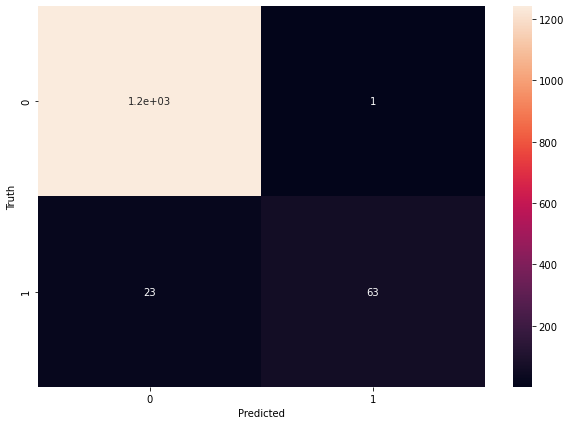

In [92]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Building Data Models ( XGBoost)

In [91]:
model2 = ExtraTreesClassifier()
model2.fit(X,y)
print(model2.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

[0.17186492 0.07741483 0.10451768 0.0108503  0.05930618 0.12228201
 0.01144497 0.00667032 0.00327412 0.01871172 0.36661903 0.02926592
 0.00733804 0.01043995]


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

the above chat has ranked our various feature base on the correlation with our dependent variable

In [54]:
classifier = XGBClassifier(base_score=0.8,n_estimators=350,max_depth=4,learning_rate=0.1,min_child_weight=4)
classifier.fit(X_train, y_train)

C:\Users\FrankEnedu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=350, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xg_pred = classifier.predict(X_test)

In [56]:
xg_results = pd.DataFrame({'Actual value': y_test, "Predicted value": xg_pred})

In [57]:
accuracy_score(y_test, xg_pred)

0.9894578313253012

Our model has an acuracy of approximately 98%, This simply means that if we make prediction 100 time, our model is likely to make the right prediction 98 time. this is pretty good. Now lets look at way to evaluate our model

In [58]:
xg_results.head()

,Actual value,Predicted value
3192,0,0
1629,0,0
5312,0,0
768,0,0
7114,0,0


The table above shows how good our model was able to predit the actual value, les now evaluate our model

In [59]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1242
           1       0.94      0.90      0.92        86

    accuracy                           0.99      1328
   macro avg       0.97      0.95      0.96      1328
weighted avg       0.99      0.99      0.99      1328



We can see that the model precision an 0 and 1 are also pretty good on 98% and 92% respectively

Lets now see the distribution on how our model faired with prediction using the confussion matrix heatmap

In [60]:
cm_xg = confusion_matrix(y_test, xg_pred)

In [61]:
cm_xg

array([[1237,    5],
       [   9,   77]], dtype=int64)

Text(69.0, 0.5, 'Truth')

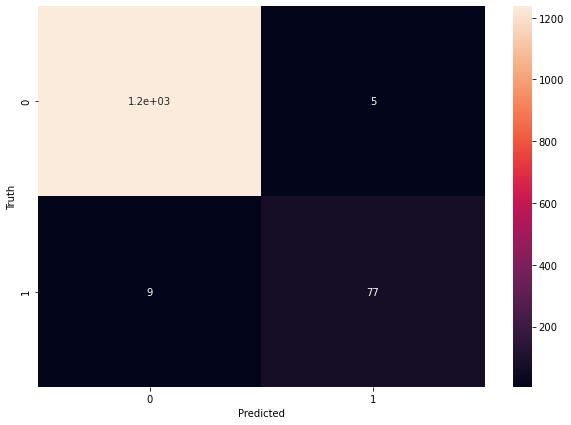

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_xg, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Building Data Models (Logistics Regresion)

In [63]:
model3 = LogisticRegression()

In [64]:
model3.fit(X_train, y_train)

C:\Users\FrankEnedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model3.score(X_test, y_test)

0.9796686746987951

Our model has an acuracy of approximately 94%, This simply means that if we make prediction 100 time, our model is likely to make the right prediction 94 time. 

In [66]:
log_pred = model3.predict(X_test)

In [67]:
log_results = pd.DataFrame({'Actual value': y_test, "Predicted value": log_pred})

In [68]:
log_results.head()

,Actual value,Predicted value
3192,0,0
1629,0,0
5312,0,0
768,0,0
7114,0,0


The table above shows how good our model was able to predit the actual value, let's now evaluate our model

In [69]:
cm_log = confusion_matrix(y_test, log_pred)
cm_log

array([[1240,    2],
       [  25,   61]], dtype=int64)

Text(69.0, 0.5, 'Truth')

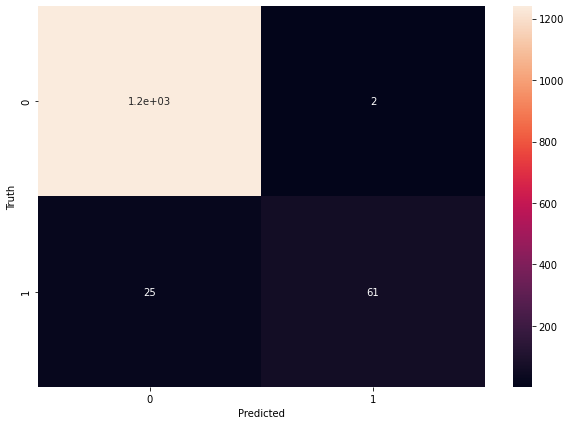

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1242
           1       0.97      0.71      0.82        86

    accuracy                           0.98      1328
   macro avg       0.97      0.85      0.90      1328
weighted avg       0.98      0.98      0.98      1328



# Building Model for Deployment

The inome, credit score, remited amount in the previous 12 monthhs, and tenure year are the most negatively correlated features to our dependent variabe (churned). thus when this features increase, the dependent variable reduces, nd vice versa. So I have selected this feature to create a deployable model 

Declearing Dependent and Independent Variable

In [72]:
new_X = hot_encoded.drop(["churned", "cust_id", "debt_with_other_lenders", "has_previous_defaults_other_lenders", "num_remittances_prev_12_mth", "main_remittance_corridor_AE_IN",	"main_remittance_corridor_AE_PH",	"main_remittance_corridor_AE_PK", "opened_campaign_1", "opened_campaign_2", "opened_campaign_3", "opened_campaign_4"], axis = 1)

In [73]:
new_X.head()

,income,credit_score,remittance_amt_prev_12_mth,tenure_years
0,63863.135880,20.0,23377.338230,2.065258
1,51537.479640,17.0,8353.525522,2.761676
2,3298.248451,2.0,1213.782465,0.297064
3,14402.605700,5.0,6202.880445,2.623058
4,8635.683507,3.0,6175.393029,0.160443


In [74]:
y = hot_encoded["churned"]

In [75]:
# spliting dataset
X_train, X_test, y_train, y_test = train_test_split(new_X,y, test_size=0.2)

In [76]:
X_test.shape

(1328, 4)

In [77]:
y_train.shape, y_test.shape

((5310,), (1328,))

Modeling

In [78]:
deploy_model = LogisticRegression()

In [79]:
deploy_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
deploy_model.score(X_test, y_test)

0.954066265060241

In [81]:
deploy_pred = deploy_model.predict(X_test)

In [82]:
deploy_results = pd.DataFrame({'Actual value': y_test, "Predicted value": deploy_pred})

In [83]:
deploy_results.head()

,Actual value,Predicted value
7334,0,0
3146,0,0
2215,0,0
666,0,0
6745,0,0


In [84]:
cm_deploy = confusion_matrix(y_test, log_pred)
cm_deploy

array([[1172,   61],
       [  93,    2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

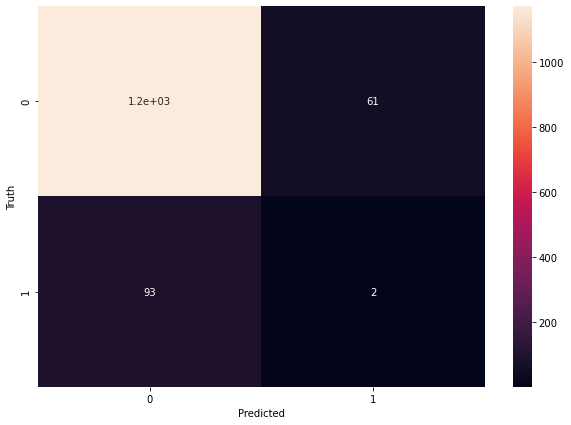

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_deploy, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1233
           1       0.03      0.02      0.03        95

    accuracy                           0.88      1328
   macro avg       0.48      0.49      0.48      1328
weighted avg       0.86      0.88      0.87      1328



We need to Pickle our model

In [87]:
pickle.dump(deploy_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))